In [28]:
from sklearn import datasets
iris=datasets.load_iris()

In [29]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [30]:
# iris
# iris.target_names

In [31]:
X=iris['data'][:,2:]  #Choose the last two columns 
y=iris['target'].reshape(-1,1)

In [32]:
X.shape,y.shape

((150, 2), (150, 1))

In [33]:
# b=iris.target[[10, 111, 50]]

# # list(iris.target_names)
# list(iris.data_names)

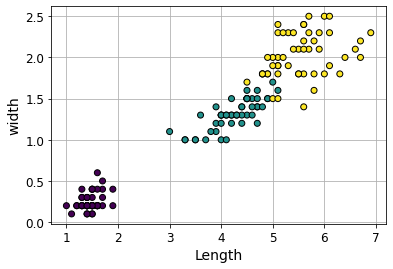

In [34]:
# visualizing the dataset

plt.figure()
plt.scatter(X[:,0],X[:,1], c = y, zorder=20,
                edgecolors='k')
plt.xlabel('Length')
plt.ylabel('width')
plt.grid()

In [35]:
# split the dataset into train and test for cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [36]:
# normalize the dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
# sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
# shuffle the dataset
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state = 2)
x_test, y_test = shuffle(x_test, y_test, random_state = 2)

In [38]:
# check wether the dataset is balanced or not
np.unique(y_train, return_counts = True)

(array([0, 1, 2]), array([36, 37, 39], dtype=int64))

# Part A

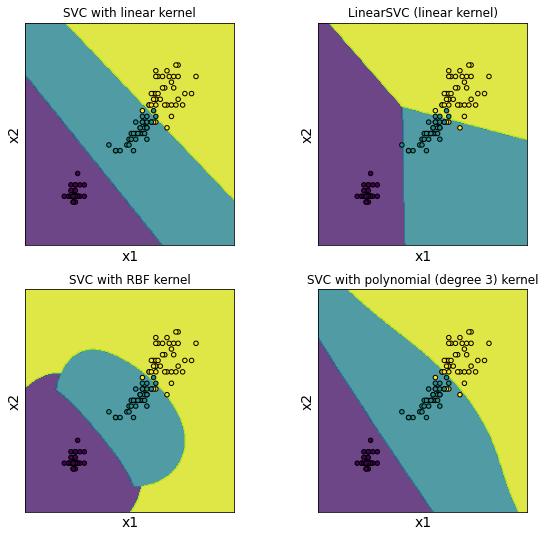

Accuracy of svm with linear kernel: 1.0
Accuracy of svm with LinearSVC (linear kernel): 1.0
Accuracy of svm with RBF kernel: 1.0
Accuracy of svm with polynomial (degree 3) kernel: 0.9473684210526315


In [116]:
from sklearn import svm

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X = x_train
y = y_train

# class_weight=None
class_weight='balanced'

models = (svm.SVC(kernel='linear',class_weight=class_weight),
          svm.LinearSVC(class_weight=class_weight),
#           svm.SVC(kernel='sigmoid',class_weight=class_weight),
          svm.SVC(kernel='rbf',class_weight=class_weight),
          svm.SVC(kernel='poly',class_weight=class_weight, degree=3))
models = (clf.fit(X, y.ravel()) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
#           'SVC with sigmoid kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2,2,  figsize=(9, 9))
plt.subplots_adjust(wspace=0.4, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

scores = []
for clf, title, ax in zip(models, titles, sub.flatten()):
    
    plot_contours(ax, clf, xx, yy,
                   alpha=0.8)
    ax.scatter(X0, X1, c=y, s=20, edgecolors='k')
    scores.append(clf.score(x_test,y_test))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

print('Accuracy of svm with linear kernel:',scores[0])
print('Accuracy of svm with LinearSVC (linear kernel):',scores[1])
print('Accuracy of svm with RBF kernel:',scores[2])
print('Accuracy of svm with polynomial (degree 3) kernel:',scores[3])

In [74]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


In [117]:
from sklearn.svm import SVC
clf1 = make_pipeline(StandardScaler(), svm.SVC(kernel='poly',degree=3))  #linear,rbf,poly
clf1.fit(x_train, y_train.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.87      1.00      0.93        13
           2       1.00      0.82      0.90        11

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



<AxesSubplot:>

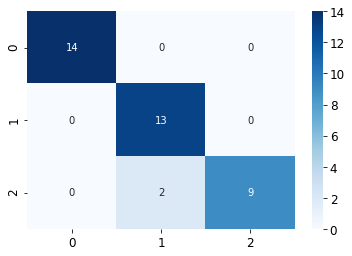

In [118]:
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, clf1.predict(x_test))) #, target_names=class_names
cf_matrix=confusion_matrix(y_test, clf1.predict(x_test))
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,cmap='Blues')

# Part B

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier

In [149]:
steps = [('scaler', StandardScaler()), ('SVM', svm.SVC(kernel = 'poly',degree=3))]
pipeline = Pipeline(steps) # define the pipeline object.
parameteres = {'SVM__C':[0.01], 'SVM__gamma':[10,20,30,40,50,60]}
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)
grid.fit(x_train, y_train.ravel())

print ('accuracy of the model is:',grid.score(x_test,y_test))
print ('best parameters of the model are:',grid.best_params_)


accuracy of the model is: 1.0
best parameters of the model are: {'SVM__C': 0.01, 'SVM__gamma': 50}


# Part C

In [172]:
clf = OneVsOneClassifier(
    svm.SVC(kernel = 'poly',degree=3)).fit(x_train, y_train.ravel())
clf.predict(x_test)
print ('accuracy of the model is:',clf.score(x_test,y_test.ravel()))
# clf.predict(x_test)

accuracy of the model is: 1.0


In [170]:
clf = OneVsRestClassifier(
    svm.SVC(kernel = 'linear')).fit(x_train, y_train.ravel())
print ('accuracy of the model is:',clf.score(x_test,y_test.ravel()))
# clf.predict(x_test)

accuracy of the model is: 0.8947368421052632
